# Output Distribution

In [41]:
from DoTLMViz import CkptedTransformer
from transformers import GPT2Tokenizer

import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

Load models and get logits for some text.

In [2]:
model = CkptedTransformer.from_pretrained(model_name="gpt2-small")

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

c:\Users\NITRO5\miniconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
text = "alpha beta gamma delta eta epsilon zeta"

In [5]:
tokens = tokenizer(text, return_tensors="pt")["input_ids"]

In [7]:
logits, ckpts = model.run_with_ckpts(tokens.to("cuda"))

In [11]:
logits[:, -1].shape

torch.Size([1, 50257])

In [20]:
data = logits[:, -1, :5].squeeze().detach().cpu()
data

tensor([-92.6705, -91.5943, -96.3149, -95.6770, -92.9472])

In [36]:
sorted_logits, sorted_idxs = torch.sort(logits[:, -1].squeeze().detach().cpu(), descending=True)
sorted_tokens = tokenizer.convert_ids_to_tokens(sorted_idxs[:5])

In [37]:
sorted_logits[:5]

tensor([-86.1463, -86.3720, -86.4686, -86.7019, -86.9343])

<BarContainer object of 5 artists>

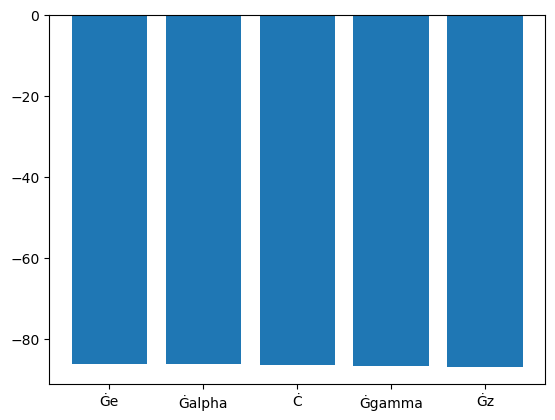

In [40]:
plt.bar(sorted_tokens, sorted_logits[:5])

Convert the logits into probability distributions and do the same again.

In [46]:
dist = F.softmax(logits[:, -1], dim=-1)

In [52]:
sorted_dist, sorted_idxs = torch.sort(dist.squeeze().detach().cpu(), descending=True)

In [53]:
sorted_tokens = tokenizer.convert_ids_to_tokens(sorted_idxs)
sorted_tokens[:5]

['Ġe', 'Ġalpha', 'Ċ', 'Ġgamma', 'Ġz']

<BarContainer object of 20 artists>

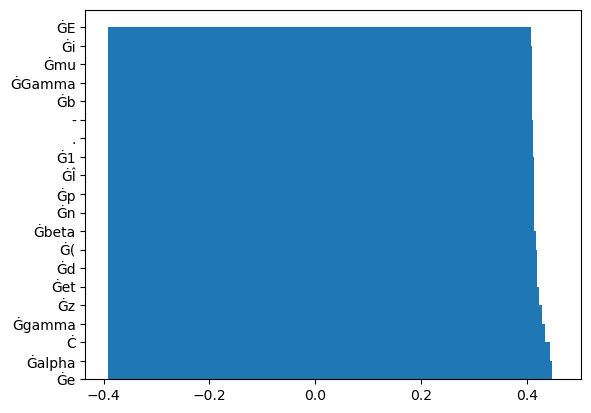

In [ ]:
plt.bar(sorted_dist[:20])

In [51]:
sorted_dist

tensor([2.0336e-12, 2.1991e-12, 2.5793e-12,  ..., 4.3695e-02, 4.8126e-02,
        6.0309e-02])